In [4]:
import pandas as pd
import sklearn
import itertools
import re
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Read and setup data textes - remove special chracters - vjve to lower case

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train['text_small'] = train.apply (lambda row: re.sub('[.,/:()]', '', row['Text'].lower()) ,axis=1)
test['text_small'] = test.apply (lambda row: re.sub('[.,/:()]', '', row['Text'].lower()) ,axis=1)

In [7]:
train.head()

,Id,Sentiment,Text,text_small
0,2805215,1.0,"Different... I like it: Ok, I have to be hones...",different i like it ok i have to be honest i w...
1,513895,0.0,Bug Report: I have bought sony microvault (USM...,bug report i have bought sony microvault usm64...
2,2365889,1.0,Great book: I really enjoy the projects in thi...,great book i really enjoy the projects in this...
3,2906018,1.0,great over-all workout: I have used this video...,great over-all workout i have used this video ...
4,1491723,1.0,Mulcahy's PMP Prep Material is Great: I used t...,mulcahy's pmp prep material is great i used th...


In [8]:
test.head()

,Id,Text,text_small
0,1658818,Drawn out than quick to end: Pages and pages o...,drawn out than quick to end pages and pages of...
1,2055550,I would have given this movie negative stars i...,i would have given this movie negative stars i...
2,1715335,Flexi Elegance Retractable Leash: I love the F...,flexi elegance retractable leash i love the fl...
3,1543515,no HEPA filter: thought I was getting the HEPA...,no hepa filter thought i was getting the hepa ...
4,388341,Works great for my newborn in her stroller: I ...,works great for my newborn in her stroller i p...


In [9]:
#creating alphabts combinations letters - 2 and 3
alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
double_letters = [''.join(i) for i in itertools.product(alphabets, repeat = 2)]
tripple_letters = [''.join(i) for i in itertools.product(alphabets, repeat = 3)]

Function for feature engineering

In [10]:
def feature_generations(df, letter_combination):
    for phrase in letter_combination:
        df.loc[:, phrase] = df.apply(lambda row: row['text_small'].count(phrase), axis = 1)
    return df

Try to learn model by a small part of dataset 1000 samples (then we'll use full data)

In [16]:
df = train[:1000]
df = feature_generations(df, double_letters)
df = feature_generations(df, tripple_letters)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyboardInterrupt: 

In [18]:
X_train, X_test, y_train, y_test = train_test_split( df.drop(['Sentiment','Text','text_small','Id'], axis = 1), df.loc[:, 'Sentiment'], test_size=0.3, random_state=42)

In [19]:
X_train

,aa,ab,ac,ad,ae,af,ag,ah,ai,aj,...,oeo,oep,oeq,oer,oes,oet,oeu,oev,oew,oex
541,0,5,3,5,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,2,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
949,0,2,4,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
334,0,0,2,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
576,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
934,0,1,7,1,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Learn a part of data

In [90]:
classifier = RandomForestClassifier(n_estimators=1000, max_features='auto', min_samples_leaf=3, random_state=10)  
classifier.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [91]:
y_score = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)
print('Accuracy score:',accuracy_score(y_test, y_score))  

Accuracy score: 0.7066666666666667


Drawing roc curve for a part of dataset

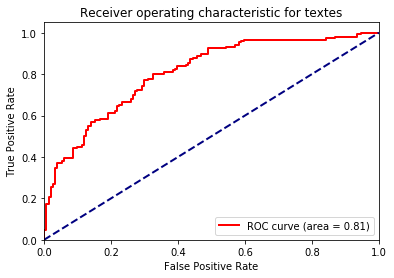

In [97]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, trash = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)

#Drqawig plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for textes')
plt.legend(loc="lower right")
plt.show()

Featute extraction and spliting data to train and test

In [ ]:
df = feature_generations(train, double_letters)
df = feature_generations(df, tripple_letters)
df_test = feature_generations(test, double_letters)
df_test = feature_generations(df_test, tripple_letters)

In [ ]:
X_train = df.drop(['Sentiment','Text','text_small','Id'], axis=1)
X_test = df_test.drop(['Sentiment','Text','text_small','Id'], axis=1)
y_train = df.loc[:, 'Sentiment']
y_test = df_test.loc[:, 'Sentiment']

Model learning and predicting results on full data

In [77]:
classifier = RandomForestClassifier(n_estimators=1000, min_samples_leaf=3, random_state=0)  
classifier.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [85]:
y_pred_proba = classifier.predict_proba(X_test)  
y_pred = classifier.predict(X_test)  

Writing probabilities and id's to file

In [101]:
def write2file(x, prediction_probability):
    x['res'] = prediction_probability[:,1]
    res = []
    for i in TT.index:
        res.append(str(i) + ',' + str(x.loc[i,'res']))
    to_file = '\n'.join(res)
    f = open('sample_submission.csv', 'w')
    f.write(to_file[:-1])

In [102]:
write2file(X_test, y_pred_proba)

/home/andrew/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
